# RQ3:  One year after the Covid-19, how to successfully get an offer?

# 1. Objective Factors

## (1) Waffle Chart: US/UK/HK* Offer distribution (offer/reject/waiting)
- IV: US/UK/HK
- DV: Offer Distribution

### extract the data needed

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('index_new_time.csv')

/Users/hujiaying/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'case', 'Unnamed: 0.1.1',
       'Unnamed: 0.1.1.1', 'id', 'uniqid', 'schoolname', 'professional',
       'countries', 'sid', 'pid', 'nid', 'offer_id', 'uid', 'degree',
       'degree_other', 'apply_results', 'apply_lang', 'year', 'timestamp',
       'updatetime', 'time_year', 'time_month', 'time_day', 'semester',
       'notice_time', 'vieworder', 'state', 'urls', 'toefl', 'gre', 'ielts',
       'ptea', 'sub', 'gmat', 'undergraduate_subject', 'undergraduate_sid',
       'undergraduate_gpa', 'graduate_subject', 'case.1'],
      dtype='object')

In [4]:
df['apply_results']

0        1
1        4
2        5
3        5
4        4
        ..
96071    3
96072    5
96073    5
96074    4
96075    1
Name: apply_results, Length: 96076, dtype: int64

In [5]:
df.apply_results.value_counts()

1    38993
3    32102
4    14588
2     8335
5     2057
0        1
Name: apply_results, dtype: int64

### recode the apply_results

In [6]:
df['apply_results'].replace(4,0,inplace=True)

In [7]:
df['apply_results'].replace([1,2,3],1,inplace=True)

In [8]:
df['apply_results'].replace(5,2,inplace=True)

In [9]:
#0-拒绝；1-offer；2-waiting list
df.apply_results.value_counts()

1    79430
0    14589
2     2057
Name: apply_results, dtype: int64

### after covid-19, the apply_results of different countries

In [10]:
df[
    (   df['time_year'] == 2020) & 
        ((df['time_month'] >= 9) & 
        (df['time_month'] <= 12)    )     |
    (   df['time_year'] == 2021) & 
        ((df['time_month'] >= 1) & 
        (df['time_month'] <= 8)    )     

].groupby(by='countries').apply_results.value_counts().tail(10)

countries  apply_results
荷兰         1                454
           0                 79
西班牙        1                 54
           0                 15
           2                  7
韩国         0                  2
香港         1                860
           0                 86
           2                 15
马来西亚       1                  1
Name: apply_results, dtype: int64

In [11]:
print(pd.crosstab(df['countries'],df['apply_results'],margins=True)) 

apply_results      0      1     2    All
countries                               
丹麦               197    701     7    905
以色列                1      6     0      7
其他                 0     12     0     12
冰岛                 0      3     0      3
加拿大             1425   4209    62   5696
匈牙利                3     11     1     15
台湾                 0      5     0      5
奥地利                4     11     0     15
德国               126    311     3    440
意大利              115    581     7    703
挪威                71    149     3    223
捷克                 1      9     0     10
新加坡              487   3658    24   4169
新西兰                4     80     0     84
日本                74    293     3    370
欧洲                 0     65     0     65
比利时               74    481     3    558
沙特阿拉伯              4     13     0     17
法国               108    262     4    374
波兰                 1      0     0      1
港/澳/台              0    705     0    705
澳大利亚              63   1790     8   1861
澳洲/新西兰          

### take US,UK,HK as example, and visualize the data

In [35]:
#pip install pywaffle

     |████████████████████████████████| 526 kB 2.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [13]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

In [14]:
import pandas as pd
data = pd.DataFrame(
    {
        'labels': ['Offer', 'Reject', 'Waiting'],
        'America': [30867,7777,1435],
        'England': [11497,2107,117],
        'Hong Kong': [16976,646,194],
    },
).set_index('labels')

/Users/hujiaying/opt/anaconda3/lib/python3.8/site-packages/pywaffle/waffle.py:394: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  self.ax = self.add_subplot(loc, aspect="equal")


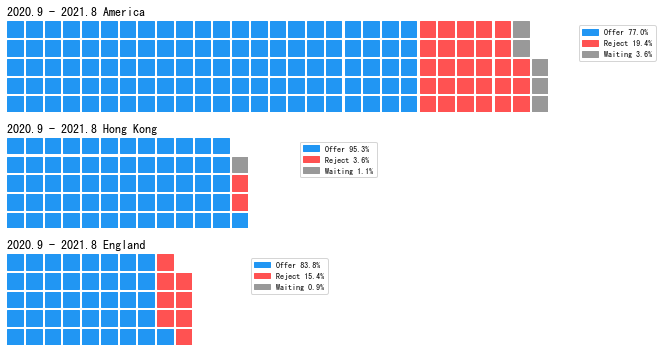

In [15]:
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '311': {
            'values': data['America'] / 280,
            'labels': ['{} {:.1f}%'.format(k, (v/(sum(data['America']))*100)) for k, v in data['America'].items()],
            'legend': {
                'loc': 'upper left',
                'bbox_to_anchor': (1.05, 1),
                'fontsize': 8
            },
            'title': {
                'label': '2020.9 - 2021.8 America',
                'loc': 'left'
            }
        },
        '312': {
            'values': data['Hong Kong'] / 280,
            'labels': ['{} {:.1f}%'.format(k, (v/(sum(data['Hong Kong']))*100)) for k, v in data['Hong Kong'].items()],
            'legend': {
                'loc': 'upper left',
                'bbox_to_anchor': (1.2, 1),
                'fontsize': 8
            },
            'title': {
                'label': '2020.9 - 2021.8 Hong Kong',
                'loc': 'left'
            }
        },
        '313': {
            'values': data['England'] / 280,
            'labels': ['{} {:.1f}%'.format(k, (v/(sum(data['England']))*100)) for k, v in data['England'].items()],
            'legend': {
                'loc': 'upper left',
                'bbox_to_anchor': (1.3, 1),
                'fontsize': 8
            },
            'title': {
                'label': '2020.9 - 2021.8 England',
                'loc': 'left'
            }
        },
    },
    rows=5,
    colors=("#2196f3", "#ff5252", "#999999"),  # shared parameter among subplots
    figsize=(9, 5)  # figsize is a parameter of plt.figure
)

## (2) Calender Chart: US/UK/HK* Day* Number of Offer Noticed
- IV1: US/UK/HK
- IV2: Day
- DV: Number of Offer Noticed

In [16]:
import pandas as pd
df = pd.read_csv('index_new_time.csv')

/Users/hujiaying/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### extract data of US

In [17]:
source = df[
    (df['countries'] == '美国')             &  
    
    (   (   (df['time_year'] == 2020) & 
            ((df['time_month'] >= 9) & 
            (df['time_month'] <= 12))   )  |
        (   (df['time_year'] == 2021) & 
            ((df['time_month'] >= 1) & 
            (df['time_month'] <= 8))    )  )

]

In [18]:
import time
source['notice_time']=pd.to_datetime(source['notice_time'],unit='s')

<ipython-input-18-2584b28e64ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  source['notice_time']=pd.to_datetime(source['notice_time'],unit='s')


In [19]:
source['notice_time']

120     2021-04-12 16:00:00
121     2021-04-04 16:00:00
124     2021-03-16 16:00:00
125     2021-02-16 16:00:00
126     2021-03-29 16:00:00
                ...        
33873   2020-10-01 16:00:00
33881   2020-09-08 16:00:00
33884   2020-09-25 16:00:00
33959   2020-09-05 16:00:00
34150   2021-02-27 16:00:00
Name: notice_time, Length: 1764, dtype: datetime64[ns]

In [20]:
source['notice_time'] = source['notice_time'].apply(lambda x: x.strftime('%Y-%m-%d'))

<ipython-input-20-c1d5f93a67dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  source['notice_time'] = source['notice_time'].apply(lambda x: x.strftime('%Y-%m-%d'))


In [21]:
source['notice_time']

120      2021-04-12
121      2021-04-04
124      2021-03-16
125      2021-02-16
126      2021-03-29
            ...    
33873    2020-10-01
33881    2020-09-08
33884    2020-09-25
33959    2020-09-05
34150    2021-02-27
Name: notice_time, Length: 1764, dtype: object

In [22]:
new = source[(source['countries'] == '美国')
      ]['notice_time'].value_counts()   #这里是所有类型的offer通知

In [23]:
new = new.to_dict()

In [24]:
usa_after = pd.DataFrame({'date':new.keys(),'offers':new.values()})
usa_after

,date,offers
0,2021-03-01,77
1,2021-02-24,66
2,2021-03-09,61
3,2021-03-02,45
4,2021-03-12,45
...,...,...
181,2021-05-19,1
182,2020-09-29,1
183,2020-12-29,1
184,2021-05-31,1


In [25]:
usa_after['date'] = pd.to_datetime(usa_after['date'])

In [26]:
usa_after['year'] = usa_after['date'].apply(lambda x: x.strftime('%Y'))

In [27]:
usa_after['year']

0      2021
1      2021
2      2021
3      2021
4      2021
       ... 
181    2021
182    2020
183    2020
184    2021
185    2021
Name: year, Length: 186, dtype: object

In [28]:
usa_after

,date,offers,year
0,2021-03-01,77,2021
1,2021-02-24,66,2021
2,2021-03-09,61,2021
3,2021-03-02,45,2021
4,2021-03-12,45,2021
...,...,...,...
181,2021-05-19,1,2021
182,2020-09-29,1,2020
183,2020-12-29,1,2020
184,2021-05-31,1,2021


In [29]:
usa_after.to_csv('usa_after_offers_for_calender.csv')

### visualize data of US

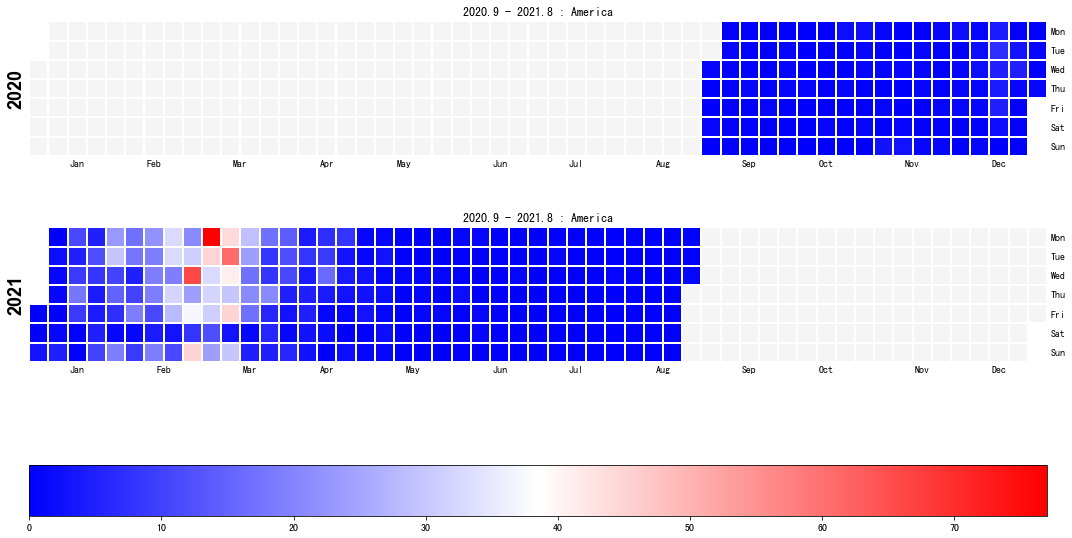

In [33]:
fig,ax=calmap.calendarplot(df['offers'],
                           fig_kws={'figsize': (15,10)}, 
                           #cmap= 'YlGn',
                           #cmap= 'seismic',
                           cmap = 'bwr',
                           yearlabel_kws={'color':'black', 'fontsize':18}, 
                           subplot_kws={'title':'2020.9 - 2021.8 : America'},
                          #linewidth=0
                          )

fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist(),orientation='horizontal')

### extract data of UK

In [53]:
import pandas as pd
df = pd.read_csv('index_new_time.csv')

/Users/hujiaying/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [54]:
source = df[
    (df['countries'] == '英国')             &  
    
    (   (   (df['time_year'] == 2020) & 
            ((df['time_month'] >= 9) & 
            (df['time_month'] <= 12))   )  |
        (   (df['time_year'] == 2021) & 
            ((df['time_month'] >= 1) & 
            (df['time_month'] <= 8))    )  )

]

In [55]:
import time
source['notice_time']=pd.to_datetime(source['notice_time'],unit='s')
source['notice_time']

<ipython-input-55-642e7f235d29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  source['notice_time']=pd.to_datetime(source['notice_time'],unit='s')


30      2021-03-22 16:00:00
96      2021-07-04 16:00:00
123     2021-02-24 16:00:00
135     2021-03-24 16:00:00
136     2021-06-29 16:00:00
                ...        
33950   2020-09-08 16:00:00
33958   2020-09-03 16:00:00
33987   2020-12-08 16:00:00
34708   2020-11-17 16:00:00
35674   2020-11-17 16:00:00
Name: notice_time, Length: 1071, dtype: datetime64[ns]

In [56]:
source['notice_time'] = source['notice_time'].apply(lambda x: x.strftime('%Y-%m-%d'))
source['notice_time']

<ipython-input-56-a5edf7382907>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  source['notice_time'] = source['notice_time'].apply(lambda x: x.strftime('%Y-%m-%d'))


30       2021-03-22
96       2021-07-04
123      2021-02-24
135      2021-03-24
136      2021-06-29
            ...    
33950    2020-09-08
33958    2020-09-03
33987    2020-12-08
34708    2020-11-17
35674    2020-11-17
Name: notice_time, Length: 1071, dtype: object

In [57]:
new = source[(source['countries'] == '英国')
      ]['notice_time'].value_counts()   #这里是所有类型的offer通知

In [58]:
new = new.to_dict()

In [59]:
uk_after = pd.DataFrame({'date':new.keys(),'offers':new.values()})
uk_after

,date,offers
0,2021-01-20,18
1,2020-12-17,16
2,2021-01-13,15
3,2020-12-16,15
4,2020-12-02,15
...,...,...
213,2021-05-30,1
214,2021-06-02,1
215,2020-09-30,1
216,2020-12-30,1


In [60]:
uk_after['date'] = pd.to_datetime(uk_after['date'])

In [61]:
uk_after['year'] = uk_after['date'].apply(lambda x: x.strftime('%Y'))

In [62]:
uk_after['year']

0      2021
1      2020
2      2021
3      2020
4      2020
       ... 
213    2021
214    2021
215    2020
216    2020
217    2021
Name: year, Length: 218, dtype: object

In [63]:
uk_after

,date,offers,year
0,2021-01-20,18,2021
1,2020-12-17,16,2020
2,2021-01-13,15,2021
3,2020-12-16,15,2020
4,2020-12-02,15,2020
...,...,...,...
213,2021-05-30,1,2021
214,2021-06-02,1,2021
215,2020-09-30,1,2020
216,2020-12-30,1,2020


In [64]:
uk_after.to_csv('uk_after_offers_for_calender.csv')

### visualize data of UK

In [65]:
# import data
df = pd.read_csv('uk_after_offers_for_calender.csv',parse_dates=['date'])
df.set_index('date', inplace=True)

In [66]:
df.index = pd.to_datetime(df.index)
df = df.sort_index()

In [67]:
df_sub = df['2020']

<ipython-input-67-1e949567b836>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_sub = df['2020']


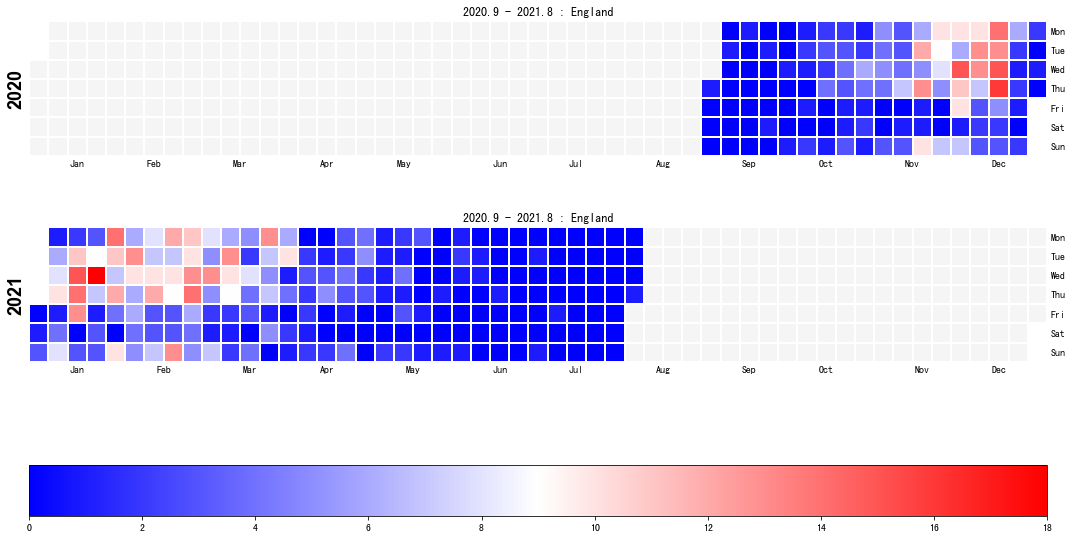

In [68]:
fig,ax=calmap.calendarplot(df['offers'],
                           fig_kws={'figsize': (15,10)}, 
                           #cmap= 'YlGn',
                           #cmap= 'seismic',
                           cmap = 'bwr',
                           yearlabel_kws={'color':'black', 'fontsize':18}, 
                           subplot_kws={'title':'2020.9 - 2021.8 : England'},
                          #linewidth=0
                          )

fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist(),orientation='horizontal')

### extract data of HK

In [69]:
import pandas as pd
df = pd.read_csv('index_new_time.csv')

/Users/hujiaying/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [71]:
source = df[
    (df['countries'] == '香港')             &  
    
    (   (   (df['time_year'] == 2020) & 
            ((df['time_month'] >= 9) & 
            (df['time_month'] <= 12))   )  |
        (   (df['time_year'] == 2021) & 
            ((df['time_month'] >= 1) & 
            (df['time_month'] <= 8))    )  )

]

In [72]:
import time
source['notice_time']=pd.to_datetime(source['notice_time'],unit='s')
source['notice_time']

<ipython-input-72-642e7f235d29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  source['notice_time']=pd.to_datetime(source['notice_time'],unit='s')


105     2021-08-30 16:00:00
106     2021-08-30 16:00:00
142     2021-06-06 16:00:00
157     2021-04-09 16:00:00
160     2021-01-19 16:00:00
                ...        
33768   2020-11-03 16:00:00
33814   2020-10-22 16:00:00
33859   2020-10-08 16:00:00
33892   2020-09-25 16:00:00
33893   2020-09-25 16:00:00
Name: notice_time, Length: 961, dtype: datetime64[ns]

In [73]:
source['notice_time'] = source['notice_time'].apply(lambda x: x.strftime('%Y-%m-%d'))
source['notice_time']

<ipython-input-73-a5edf7382907>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  source['notice_time'] = source['notice_time'].apply(lambda x: x.strftime('%Y-%m-%d'))


105      2021-08-30
106      2021-08-30
142      2021-06-06
157      2021-04-09
160      2021-01-19
            ...    
33768    2020-11-03
33814    2020-10-22
33859    2020-10-08
33892    2020-09-25
33893    2020-09-25
Name: notice_time, Length: 961, dtype: object

In [74]:
new = source[(source['countries'] == '香港')
      ]['notice_time'].value_counts()   #这里是所有类型的offer通知

In [75]:
new = new.to_dict()

In [76]:
hk_after = pd.DataFrame({'date':new.keys(),'offers':new.values()})
hk_after

,date,offers
0,2020-11-12,31
1,2021-03-04,26
2,2021-01-14,21
3,2021-01-26,17
4,2020-12-20,16
...,...,...
192,2020-11-16,1
193,2020-12-19,1
194,2020-10-22,1
195,2021-05-13,1


In [77]:
hk_after['date'] = pd.to_datetime(hk_after['date'])

In [78]:
hk_after['year'] = hk_after['date'].apply(lambda x: x.strftime('%Y'))

In [79]:
hk_after['year']

0      2020
1      2021
2      2021
3      2021
4      2020
       ... 
192    2020
193    2020
194    2020
195    2021
196    2020
Name: year, Length: 197, dtype: object

In [80]:
hk_after

,date,offers,year
0,2020-11-12,31,2020
1,2021-03-04,26,2021
2,2021-01-14,21,2021
3,2021-01-26,17,2021
4,2020-12-20,16,2020
...,...,...,...
192,2020-11-16,1,2020
193,2020-12-19,1,2020
194,2020-10-22,1,2020
195,2021-05-13,1,2021


In [81]:
hk_after.to_csv('hk_after_offers_for_calender.csv')

### visualize data of HK

In [82]:
# import data
df = pd.read_csv('hk_after_offers_for_calender.csv',parse_dates=['date'])
df.set_index('date', inplace=True)

In [83]:
df.index = pd.to_datetime(df.index)
df = df.sort_index()

In [84]:
df_sub = df['2020']

<ipython-input-84-1e949567b836>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_sub = df['2020']


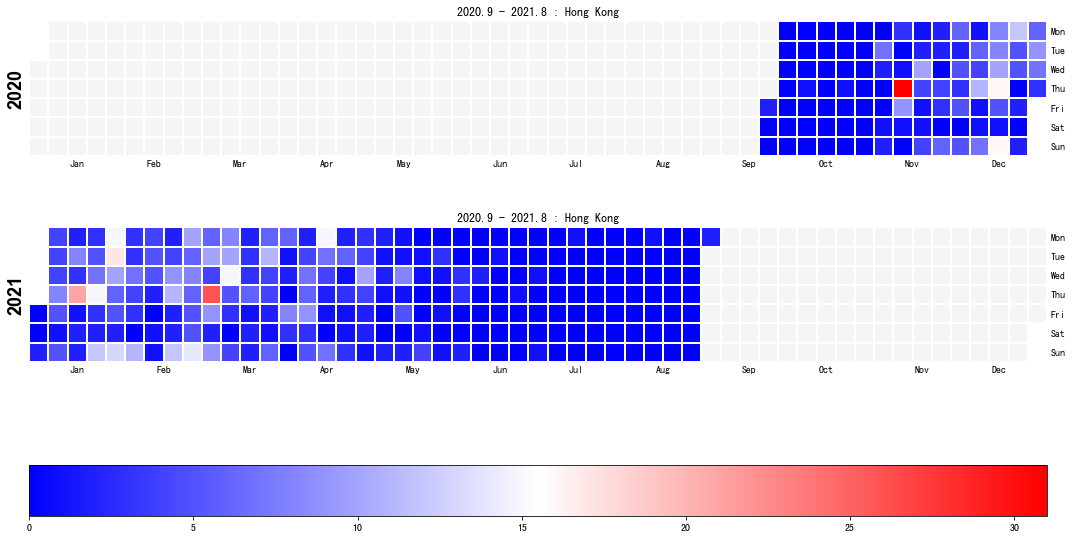

In [85]:
fig,ax=calmap.calendarplot(df['offers'],
                           fig_kws={'figsize': (15,10)}, 
                           #cmap= 'YlGn',
                           #cmap= 'seismic',
                           cmap = 'bwr',
                           yearlabel_kws={'color':'black', 'fontsize':18}, 
                           subplot_kws={'title':'2020.9 - 2021.8 : Hong Kong'},
                          #linewidth=0
                          )

fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist(),orientation='horizontal')

## (3) Word Cloud: Words of Cloud of Major Applied by Applicants
- IV: major
- DV: Number of major

In [87]:
import pandas as pd

In [88]:
df = pd.read_csv('index_new_time.csv')

/Users/hujiaying/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### extract the professional text

In [89]:
pf = df[
    (   df['time_year'] == 2020) & 
        ((df['time_month'] >= 9) & 
        (df['time_month'] <= 12)    )     |
    (   df['time_year'] == 2021) & 
        ((df['time_month'] >= 1) & 
        (df['time_month'] <= 8)    )     

]

In [90]:
pf

,Unnamed: 0,Unnamed: 0.1,case,Unnamed: 0.1.1,Unnamed: 0.1.1.1,id,uniqid,schoolname,professional,countries,...,gre,ielts,ptea,sub,gmat,undergraduate_subject,undergraduate_sid,undergraduate_gpa,graduate_subject,case.1
4,4,4,4,4,4,120429,vnz00uD4uCCC,Eidgenossische Technische Hochschule Zürich,Mechanical and Process Engineering,瑞士,...,"{'v': '163', 'q': '170', 'aw': '4.0', 'z': '333'}","{'r': '', 'l': '', 's': '', 'w': '', 'z': ''}","{'r': '', 'l': '', 's': '', 'w': '', 'z': ''}","{'zy': '0', 'z': ''}","{'q': '', 'v': '', 'z': ''}",New Energy Science and Engineering,211,87/100,Energy Science and Technology,4
30,30,30,30,32,32,120400,KjufufauzPH9,University of Edinburgh,Law,英国,...,"{'v': '', 'q': '', 'aw': '', 'z': ''}","{'r': '', 'l': '', 's': '', 'w': '', 'z': ''}","{'r': '', 'l': '', 's': '', 'w': '', 'z': ''}","{'zy': '0', 'z': ''}","{'q': '', 'v': '', 'z': ''}",NaN,NaN,NaN,NaN,30
36,36,36,36,39,39,120391,KfCzfWbu90yr,Simon Fraser University,TLGC,加拿大,...,"{'v': '', 'q': '', 'aw': '', 'z': ''}","{'r': '8.5', 'l': '8', 's': '6.5', 'w': '6.5',...","{'r': '73', 'l': '77', 's': '89', 'w': '73', '...","{'zy': '0', 'z': ''}","{'q': '', 'v': '', 'z': ''}",会计,211,83,NaN,36
47,47,47,47,51,51,120379,zPnTzf1mLzfO,The University of New South Wales,Information Technology,澳大利亚,...,"{'v': '', 'q': '', 'aw': '', 'z': ''}","{'r': '', 'l': '', 's': '', 'w': '', 'z': ''}","{'r': '66', 'l': '66', 's': '72', 'w': '68', '...","{'zy': '0', 'z': ''}","{'q': '', 'v': '', 'z': ''}",信息安全,211,2.7/4.0,NaN,47
48,48,48,48,52,52,120378,LrbzjmiOn48i,The University of Sydney,Information Technology,澳大利亚,...,"{'v': '', 'q': '', 'aw': '', 'z': ''}","{'r': '', 'l': '', 's': '', 'w': '', 'z': ''}","{'r': '66', 'l': '66', 's': '72', 'w': '68', '...","{'zy': '0', 'z': ''}","{'q': '', 'v': '', 'z': ''}",信息安全,211,2.7/4.0,NaN,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33987,33987,33987,33987,54393,5345,111445,rH1nPry9aT5q,The University of Manchester,communication engineering,英国,...,"{'v': '', 'q': '', 'aw': '', 'z': ''}","{'r': '7.5', 'l': '7.5', 's': '5.5', 'w': '5.5...","{'r': '', 'l': '', 's': '', 'w': '', 'z': ''}","{'zy': '0', 'z': ''}","{'q': '', 'v': '', 'z': ''}",通信工程,NaN,78.89,NaN,33987
34150,34150,34150,34150,54713,5665,111250,OTnXSLXS5mnf,University of Wisconsin 威斯康星大学,Economics and Econometrics 经济学和计量经济学,美国,...,"{'z': '', 'v': '154', 'q': '', 'aw': '3.5'}","{'z': '', 'l': '', 'r': '', 's': '', 'w': ''}","{'r': '', 'l': '', 's': '', 'w': '', 'z': ''}","{'zy': '0', 'z': ''}","{'z': '', 'q': '', 'v': ''}",经济与金融,NaN,3.3,NaN,34150
34708,34708,34708,34708,55793,6745,110597,mjaGP5nzHn5u,The University of Warwick,Computer Science,英国,...,"{'v': '', 'q': '', 'aw': '', 'z': ''}","{'r': '7', 'l': '7', 's': '6', 'w': '6.5', 'z'...","{'r': '', 'l': '', 's': '', 'w': '', 'z': ''}","{'zy': '0', 'z': ''}","{'q': '', 'v': '', 'z': ''}",网络工程,NaN,3.19/4,NaN,34708
35152,35152,35152,35152,56660,7612,110070,4ia4OTGTfiiy,Sciences Po,International Management and Sustainability,法国,...,"{'v': '', 'q': '', 'aw': '', 'z': ''}","{'r': '8. 5', 'l': '7', 's': '6. 5', 'w': '6. ...",NaN,"{'zy': '0', 'z': ''}","{'q': '', 'v': '', 'z': ''}",工商管理,NaN,GPA 3.8/5.0 (Top 5 in 105),NaN,35152


In [91]:
pf = pf['professional'].to_list()

In [92]:
pf

['Mechanical and Process Engineering',
 'Law',
 'TLGC',
 'Information Technology',
 'Information Technology',
 'Computer Science',
 'Computer Science',
 'industrial design',
 'Autonomous Systems Engineering',
 'mpp',
 'Materials Engineering',
 'Materials Engineering',
 'Materials Engineering',
 'Materials Engineering',
 'Materials Engineering',
 'Civil Engineering',
 'Transport',
 'Data Science',
 'Statistics',
 'Graphic Design',
 'Design',
 'Graphic Communication',
 'Design and Visual Communications',
 'Graphic Design',
 'Graphic Design',
 'Communication Design',
 'Graphic Design',
 'Visual Communication Design',
 'Fashion and Luxury',
 'Fashion Business',
 'Master of Professional Studies degree in Fashion Management',
 'Integrated Marketing-brand management',
 'Furniture Design',
 'Material Future',
 'Design Product',
 'Industrial and Product Design',
 'Furniture Design',
 'Furniture Design',
 'Furniture Design',
 'Cyber Security',
 '中国环保研究',
 'Computer Science',
 'Computer Science',

In [93]:
file = open('professional_name_after_covid19.txt','w')
for i in pf:
    file.write(str(i))
file.close()

### visualize the data - method 1

In [94]:
import wordcloud

w = wordcloud.WordCloud(      
    width=400,
    height=200,
    background_color='black',
    font_path=None, 
    font_step=1,
    min_font_size=4,
    max_font_size=None,
    max_words=200,
    stopwords={},
    scale=1,
    prefer_horizontal=0.9,
    relative_scaling=0.5,
    mask=None) 

In [95]:
# read the text profile
f = open('professional_name_after_covid19.txt',encoding='utf-8')
txt = f.read()

# construct the word cloud "w"，and set params
w = wordcloud.WordCloud(width=1000,
                        height=700,
                        background_color='white',
                        stopwords={'FT','PT','and','in','master','a','as','or'},
                        font_path=None, 
                        font_step=3,
                        min_font_size=8,
                        max_font_size=None,
                        max_words=150,
                        scale=1,
                        prefer_horizontal=0.9,
                        relative_scaling=0.5,
                        mask=None
                
                       )

# pass txt to "w"
w.generate(txt)

# generate the picture
w.to_file('professional_cloud_after_covid19.png')

### visualize the data - method 2

In [ ]:
https://www.jasondavies.com/wordcloud/

# 2. Subjective Factors

## (1) Bar Chart: IELTS Score* Proportion of Offer
- IV: IELTS Score
- DV: Proportion of Receiving Offer

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('data_clean.csv')

In [3]:
#Locate the time period
df = df[(df['time_year'] == 2020) & 
            ((df['time_month'] >= 9) & (df['time_month'] <= 12))     |
            (df['time_year'] == 2021) & 
            ((df['time_month'] >= 1) & (df['time_month'] < 9))]

In [4]:
#Drop the unreasonable score
df = df.drop(df[(df.ieltsz <= 1)].index)

In [7]:
z1 = df[df['apply_results'] == 1].groupby('ieltsz')['ieltsz'].size().values
z2 = df[df['apply_results'] != 1].groupby('ieltsz')['ieltsz'].size().values

In [8]:
y1 = z1.tolist()
y2 = z2.tolist()

[0.8275862068965517, 0.8853503184713376, 0.75139146567718, 0.707488986784141, 0.7278731836195509, 0.6928571428571428, 0.8181818181818182]
[0.1724137931034483, 0.11464968152866242, 0.24860853432282004, 0.29251101321585904, 0.27212681638044917, 0.30714285714285716, 0.18181818181818182]


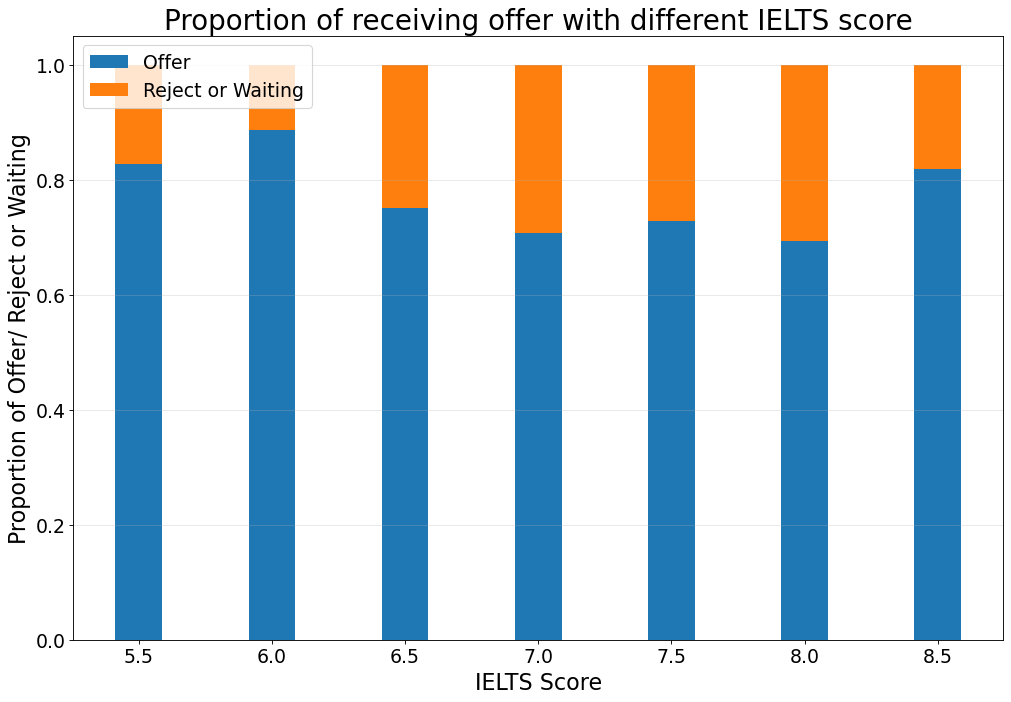

In [9]:
#stacked bar
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10), dpi=80)
plt.grid(axis="y", alpha=0.3)
labels = ['5.5', '6.0', '6.5', '7.0', '7.5', '8.0', '8.5']
data = [y1, y2]
x = range(len(labels))
width = 0.35

# Initialize all bottom_y elements to 0
bottom_y = [0] * len(labels)
# Calculate the sum of each group of columns in preparation for calculating the percentage
sums = [sum(i) for i in zip(y1, y2)]
for i in data:
    y = [a/b for a, b in zip(i, sums)] # Calculate the height of each column (ie. the percentage)
    print(y) # proportion data
    plt.bar(x, y, width, bottom=bottom_y)
    bottom_y = [(a+b) for a, b in zip(y, bottom_y)]# Calculate the position of the bottom parameter


plt.title('Proportion of receiving offer with different IELTS score', fontsize=25)
plt.xlabel("IELTS Score",fontsize=20)
plt.ylabel("Proportion of Offer/ Reject or Waiting",fontsize=20)
plt.xticks(x, labels, fontsize=17)
plt.yticks(fontsize=17)
plt.legend(['Offer', 'Reject or Waiting'],loc="upper left",fontsize=17)
#plt.savefig("plot14.jpg")
plt.show()

## (2) Pie Chart: Graduate University Degree* Proportion of Offer
- IV: Acadamic Degree of Graduate University 
- DV: Proportion of Receiving Offer

In [11]:
import pandas as pd
df = pd.read_csv('data_clean.csv')

In [12]:
#Replace '0'(waiting list) with '2'(reject) for convenience
df['apply_results'].replace(0,2,inplace=True)
df.apply_results.value_counts()

1    72180
2    16591
Name: apply_results, dtype: int64

In [13]:
#Locate 2020.9—2021.9
time3=df.loc[df['time_year'].isin([2020])] 
concrete3=time3.loc[df['time_month'].isin([9,10,11,12])]
time4=df.loc[df['time_year'].isin([2021])]
concrete4=time4.loc[df['time_month'].isin([1,2,3,4,5,6,7,8])]

In [14]:
#Create a new DataFrame according the to time condition
apply2=pd.concat([concrete3,concrete4])

In [15]:
#Check the graduate university degree
apply2.undergraduate_sid

139        2
155        2
158        2
161        2
249      NaN
        ... 
33279    NaN
33321    NaN
33322    NaN
33397    NaN
34122    NaN
Name: undergraduate_sid, Length: 7198, dtype: object

### 985
- ['undergraduate_sid'] == '1'

<Figure size 600x600 with 0 Axes>

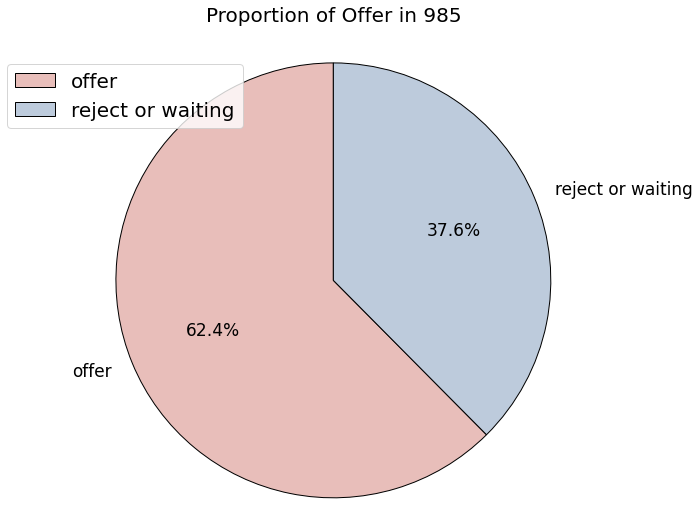

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6), dpi=100)
fig,ax = plt.subplots()

x = apply2[apply2['undergraduate_sid'] == '1'].groupby('apply_results')['apply_results'].size()

labels=['offer','reject or waiting']
colors=['#e8beba','#bdcbdc']
pie = ax.pie(x,
             startangle=90,
             autopct='%1.1f%%',
             radius=2.5,
             colors=colors,
             labels=labels,
             textprops={'fontsize': 17, 'color': 'black'},
             wedgeprops={'edgecolor': "black"},
            )

plt.title('Proportion of Offer in 985',fontsize=20,pad=150)
plt.legend(['offer','reject or waiting'],loc=(-1,1.2),fontsize=20)
#plt.savefig('plot15.jpg',dpi=100, bbox_inches='tight')
plt.show()

### 211
- ['undergraduate_sid'] == '2'

<Figure size 600x600 with 0 Axes>

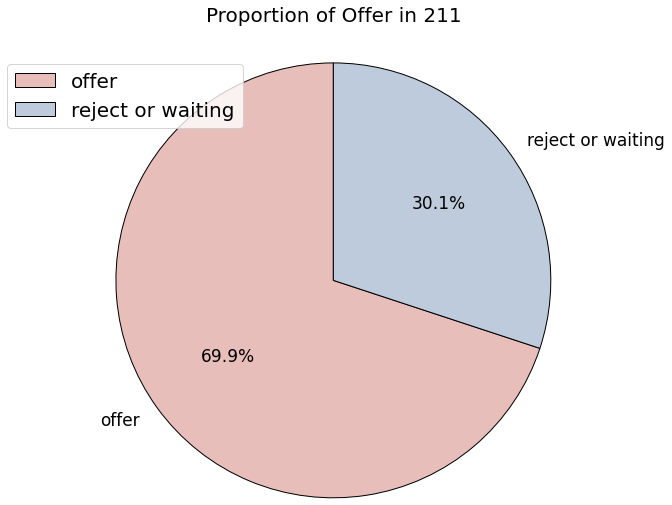

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6), dpi=100)
fig,ax = plt.subplots()

x = apply2[apply2['undergraduate_sid'] == '2'].groupby('apply_results')['apply_results'].size()

labels=['offer','reject or waiting']
colors=['#e8beba','#bdcbdc']
pie = ax.pie(x,
             startangle=90,
             autopct='%1.1f%%',
             radius=2.5,
             colors=colors,
             labels=labels,
             textprops={'fontsize': 17, 'color': 'black'},
             wedgeprops={'edgecolor': "black"},
            )

plt.title('Proportion of Offer in 211',fontsize=20,pad=150)
plt.legend(['offer','reject or waiting'],loc=(-1,1.2),fontsize=20)
#plt.savefig('plot16.jpg',dpi=100, bbox_inches='tight')
plt.show()

### neither 985 nor 211
- ['undergraduate_sid'] == '3'

<Figure size 600x600 with 0 Axes>

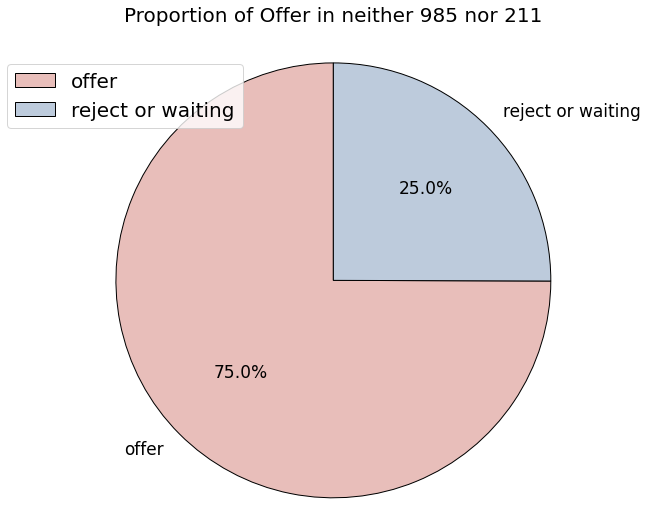

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6), dpi=100)
fig,ax = plt.subplots()

x = apply2[apply2['undergraduate_sid'] == '3'].groupby('apply_results')['apply_results'].size()

labels=['offer','reject or waiting']
colors=['#e8beba','#bdcbdc']
pie = ax.pie(x,
             startangle=90,
             autopct='%1.1f%%',
             radius=2.5,
             colors=colors,
             labels=labels,
             textprops={'fontsize': 17, 'color': 'black'},
             wedgeprops={'edgecolor': "black"},
            )

plt.title('Proportion of Offer in neither 985 nor 211',fontsize=20,pad=150)
plt.legend(['offer','reject or waiting'],loc=(-1,1.2),fontsize=20)
#plt.savefig('plot17.jpg',dpi=100, bbox_inches='tight')
plt.show()